In [4]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
#from google.colab import drive
#drive.mount('/drive', force_remount=True)

In [8]:
df = pd.read_csv("/content/drawndata1.csv")

In [9]:
df.head()

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004361,284.251445,a
4,185.243183,308.187571,a


In [10]:
X = df[['x','y']].values
y = df['z'] =='a'

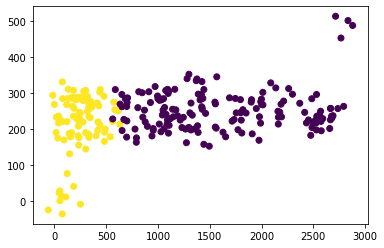

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y)

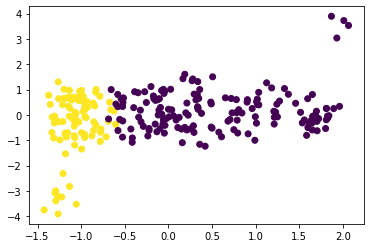

In [12]:

# Standardize features by removing the mean and scaling to unit variance.

# The standard score of a sample x is calculated as:

#     z = (x - u) / s

# where u is the mean of the training samples or zero if with_mean=False,
# and s is the standard deviation of the training samples or one if
# with_std=False.

from sklearn.preprocessing import StandardScaler, QuantileTransformer
X_scaled = StandardScaler().fit_transform(X)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)

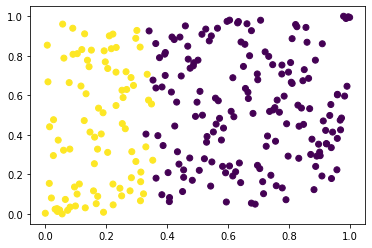

In [13]:
X_scaled = QuantileTransformer(n_quantiles=100).fit_transform(X) #good to varifie with grid search
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

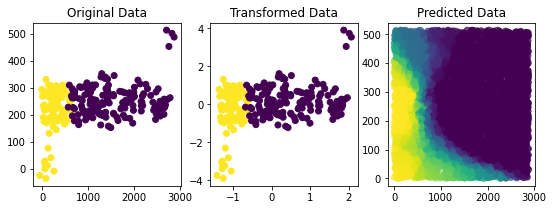

In [15]:
plot_output(scaler=StandardScaler())

# New Data

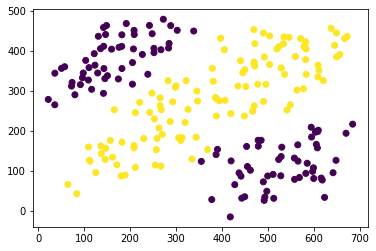

In [17]:
df = pd.read_csv("/content/drawndata2.csv")
X = df[['x','y']].values
y = df['z'] =='a'
plt.scatter(X[:, 0], X[:, 1], c=y)

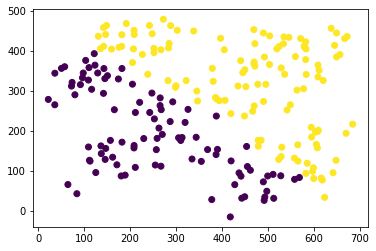

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale",QuantileTransformer(n_quantiles=100)),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred);

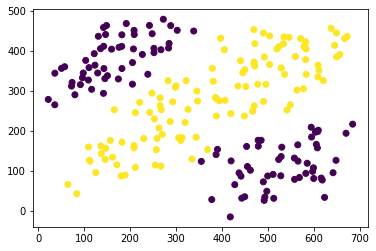

In [19]:
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred);

# One Hot Encoding


In [20]:
arr = np.array(["low", "low", "high", "medium"]).reshape(-1, 1)
arr


array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [25]:
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')# Hndle_unknown = give me 0 array insted a error for unknown data
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [27]:
enc.transform([["zero"]])



array([[0., 0., 0.]])